# Dataset ($\Omega_b, \theta_*$)  - CLASS

In [1]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# means Planck 2018 ------------------

omg_b = 0.0224  # this is actually Omg_b*(h^2). 0.015-0.03
omg_cdm = 0.120 # this is actually Omg_cdm*(h^2)          0.05-0.2

# no theta_star   
tau = 0.054
n_s = 0.965
A_s = 2.0968e-9
omg_k=0.001 # -0.2 +0.2   

h = 67.4/100  # 30- 120

# sigmas Planck 2018 ----- 


sigma_omg_b = 0.0001    #
sigma_omg_cdm = 0.001   #      
sigma_tau = 0.007
sigma_n_s = 0.004
sigma_A_s = 2.9e-11
sigma_omg_k = 0.002

sigma_h = 0.5/100

PLANCK2018_CLASS_names = ['omega_b', 'omega_cdm', 'tau_reio', 'n_s', 'A_s', 'h', 'Omega_k']
PLANCK2018_means = [omg_b, omg_cdm, tau, n_s, A_s, h, omg_k]
PLANCK2018_sigmas = [sigma_omg_b, sigma_omg_cdm, sigma_tau, sigma_n_s, sigma_A_s, sigma_h, sigma_omg_k]  
                
PLANCK2018_params = [[i,j,k] for i,j,k in zip(PLANCK2018_CLASS_names, PLANCK2018_means, PLANCK2018_sigmas)]


In [3]:
PLANCK2018_means

[0.0224, 0.12, 0.054, 0.965, 2.0968e-09, 0.674, 0.001]

In [12]:
def parameter_instances2(param_central, param_range_start, param_range_end, N):
    param_arr = np.linspace(param_range_start, param_range_end , N)
    return param_arr

In [18]:
def data_set_generator2( param_range_start, param_range_end, param_select=[0,0,0,0,0,0,0], N=10, BESTFIT_params=PLANCK2018_params, title_str=""):
    # param_select: list of 0/1 to indicate which parameter to vary FOR NOW JUST ONE
    
    #set array of varying param
    for i, value in enumerate(param_select):
        if value == 1:
            selected_param_name = BESTFIT_params[i][0]
            mean = BESTFIT_params[i][1]
            sigma = BESTFIT_params[i][2]
            selected_param_arr = parameter_instances2(mean,param_range_start, param_range_end, N)
            break
        else:
            pass

    rows = []
    count = 0
    for values in selected_param_arr:
        cosmo = Class()
        params = {
            'omega_b': BESTFIT_params[0][1],
            'omega_cdm': BESTFIT_params[1][1],
            # no theta_star
            'tau_reio': BESTFIT_params[2][1],
            'n_s': BESTFIT_params[3][1],
            'A_s': BESTFIT_params[4][1],

            'h': BESTFIT_params[5][1],
            'Omega_k': BESTFIT_params[6][1],     #we assume =0 for now
            
            'output': 'tCl',      # we only need derived params like theta_s; this is lightweight
            # optional precision tweaks
            'l_max_scalars': 500
        }
        params[selected_param_name] = values # iterate over the varying param 


        # Compute cosmology
        cosmo.set(params)
        try:
            cosmo.compute()
        except CosmoComputationError:
            print("Skipping unphysical point:", values)
            continue


        # Get theta_star CLASS exposes derived params in a dict.
        derived = cosmo.get_current_derived_parameters(['100*theta_s'])
        # Common keys: '100*theta_s' or 'theta_s'. Use whichever exists.
        theta100 = derived['100*theta_s']

        rows.append((values, theta100))

        cosmo.struct_cleanup()   # free internal structures (recommended)
        cosmo.empty()            # free memory
        count += 1
        print(count/N*100, "% completed", end='\r')

    # write CSV
    out_csv = title_str + str(selected_param_name)+"_theta_s"+str(param_range_start)+'_'+str(param_range_end)+'_N'+str(N)+".csv"
    with open(out_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([str(selected_param_name), '100*theta_s'])
        for r in rows:
            writer.writerow(r)

    print(f"Saved {len(rows)} rows to {out_csv}")

-----------
#### Datasets

In [14]:
#DONE!
# data_set_generator2(0.05, 0.2, [0,1,0,0,0,0,0], 1000)  # omg_cdm*(h^2) 0.05-0.2

In [8]:
data_set_generator2(0.05, 0.2, [0,1,0,0,0,0,0], 10)  # omg_cdm*(h^2) 0.05-0.2

Saved 10 rows to omega_cdm_theta_s0.05_0.2_N10.csv


In [15]:
N_in_3_hours= 1*3600*(10/2.5)
N_in_3_hours

14400.0

In [8]:
problematic_point=40000*(62.265/100)
print(f'Omega_cdm problematic_point: {problematic_point}')

Omega_cdm problematic_point: 24906.0


### Final Datasets
-------------- 

In [ ]:
#DONE! for N=10 000
#data_set_generator2(0.05, 0.2, [0,1,0,0,0,0,0], 10000)  # omg_cdm*(h^2) 0.05-0.2

Saved 10000 rows to omega_cdm_theta_s0.05_0.2_N10000.csv


In [17]:
#DONE! dummy 4+1 d dataset
# data_set_generator2(0.05, 0.2, [0,1,0,0,0,0,0], 111)  # omg_cdm*(h^2) 0.05-0.2

#### Plots

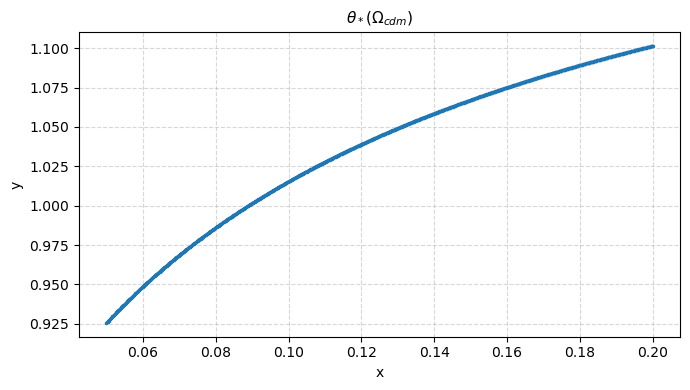

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('omega_cdm_theta_s0.05_0.2_N1000.csv')

# Simple one-graph plot
plt.figure(figsize=(7, 4))

plt.plot(df.iloc[:, 0], df.iloc[:, 1], marker='.', markersize=3)
plt.title(r'$\theta_*(\Omega_{cdm})$', fontsize=11)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("theta_star_dependence.png", dpi=300, bbox_inches='tight')
plt.show()
